In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as ms #visualize missing data
%matplotlib inline

In [2]:
weather_dataset = pd.read_csv('~/PycharmProjects/untitled/nano_data/weather_trends/results.csv')
df_city = pd.read_csv('~/PycharmProjects/untitled/nano_data/weather_trends/city_data.csv')
df_global = pd.read_csv('~/PycharmProjects/untitled/nano_data/weather_trends/global_data.csv')
weather_dataset.head()

,year,city,avg_city_temp,avg_global_temp
0,1750,Toronto,6.29,8.72
1,1751,Toronto,6.84,7.98
2,1752,Toronto,-1.10,5.78
3,1753,Toronto,5.76,8.39
4,1754,Toronto,5.94,8.47


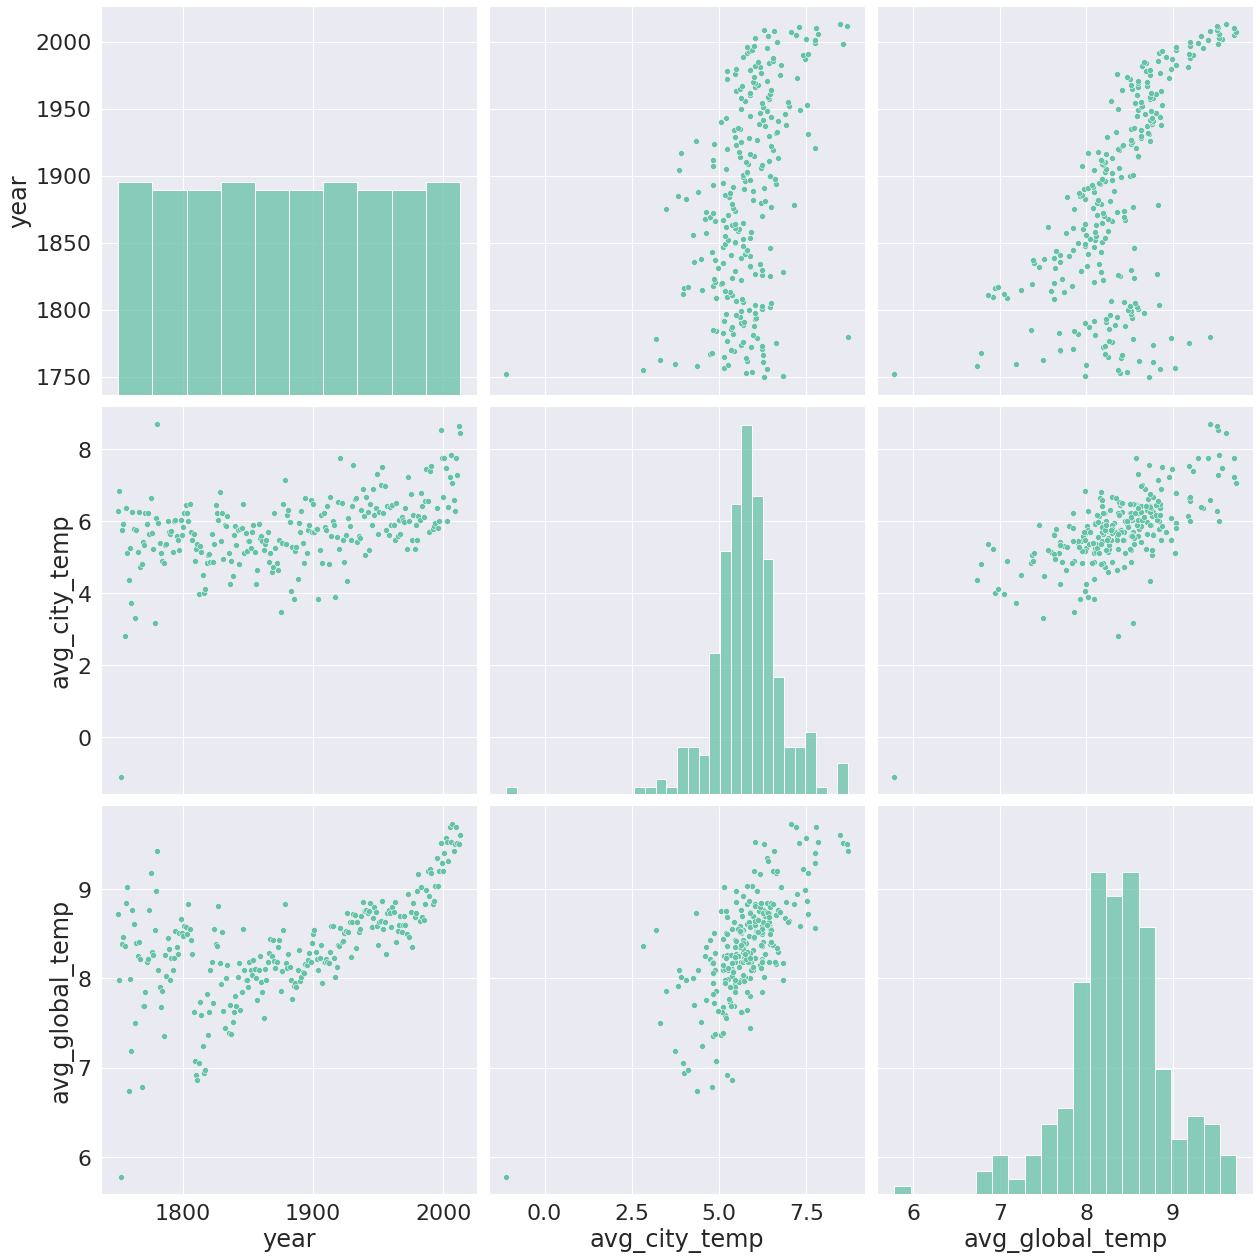

In [3]:
weather_df = pd.DataFrame(weather_dataset)
sns.set(context='notebook', style='darkgrid', palette='Set2', font='sans-serif', font_scale=2, color_codes=True)
# Generate a pairplot matrix to get a sense of the data
sns.pairplot(weather_df, height=6)

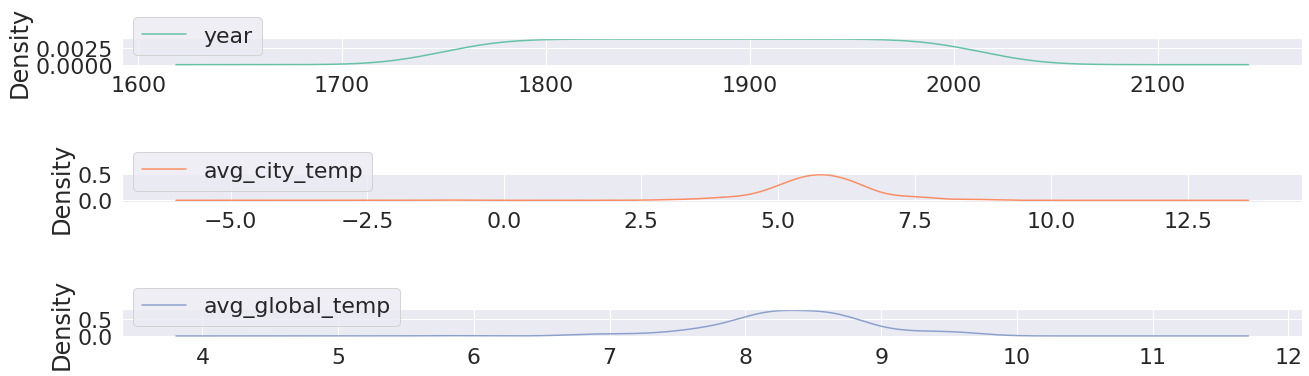

In [4]:
# Density visualisation
weather_df.plot(kind='density', subplots=True, layout=(13, 1), sharex=False, sharey=False, figsize=(20, 25))
plt.tight_layout(pad=3.0)

<AxesSubplot:>

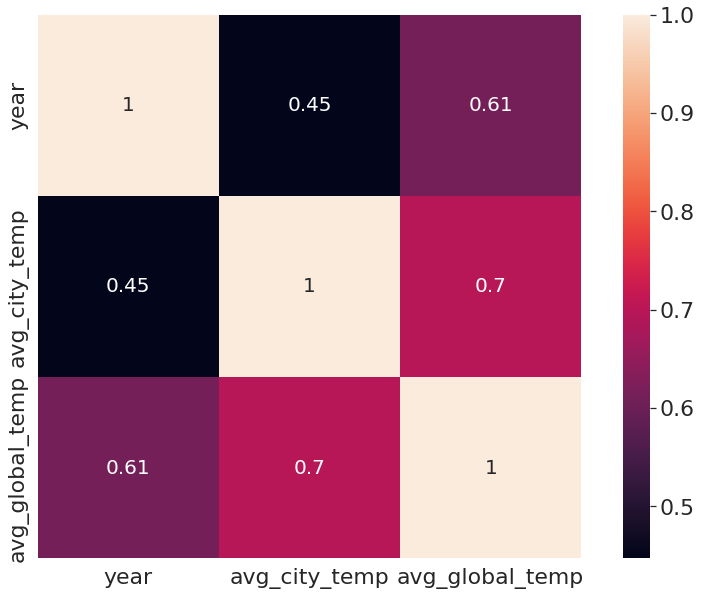

In [5]:
# Correlation visualisation
figure, ax = plt.subplots(figsize=(15, 10))
correlation_matrix = weather_df.corr()
sns.heatmap(correlation_matrix, annot=True, square=True, annot_kws={"size": 20})

In [15]:
print(f"Earliest global year: {df_global['year'].min()} \n"
      f"Latest global:        {df_global['year'].max()} \n"
      f"Minimum temperature:  {df_global['avg_temp'].min()} \n"
      f"Maximum temperature:  {df_global['avg_temp'].max()}")

Earliest global year: 1750 
Latest global:        2015 
Minimum temperature:  5.78 
Maximum temperature:  9.83


In [7]:
# min & max values for Toronto columns: year, avg_temp
print(f"{weather_df['city'][0]}'s earliest year: {weather_df['year'].min()} \n"
      f"{weather_df['city'][0]}'s latest year:   {weather_df['year'].max()} \n"
      f"Minimum temperature:     {weather_df['avg_city_temp'].min()} \n"
      f"Maximum temperature:     {weather_df['avg_city_temp'].max()}")

Toronto's earliest year: 1750 
Toronto's latest year:   2013 
Minimum temperature:     -1.1 
Maximum temperature:     8.7


In [70]:
# Find max and min discrepancies between local and global averages.
some_temp_diffs = []
for i in zip(df_global['avg_temp'], weather_df['avg_city_temp'], weather_df['year']):
    some_temp_diffs.append(i)
print(max(some_temp_diffs), min(some_temp_diffs))
subtracted_diffs = []
for e in some_temp_diffs:
    subtracted_diffs.append((e[0] - e[1], e[2]))
print(max(subtracted_diffs), min(subtracted_diffs))

(9.73, 7.07, 2007) (5.78, -1.1, 1752)
(6.880000000000001, 1752) (0.7300000000000004, 1780)
9.83
8.7


In [43]:
global_average = []
for g in df_global['avg_temp']:
    global_average.append(g)
global_avg = int(sum(global_average) / len(global_average))

toronto_average = []
for t in weather_df['avg_city_temp']:
    toronto_average.append(t)
toronto_avg = int(sum(toronto_average) / len(toronto_average))

print(f"The local average temperature is {global_avg - toronto_avg} degrees Celsius cooler than the global average.")



The local average temperature is 3 degrees Celsius cooler than the global average.


In [8]:
missing_values = weather_df[weather_df["avg_city_temp"].isna()]
missing_years = (missing_values["year"])
print(f"Missing values {missing_values}, Missing years: {missing_years}")

Missing values Empty DataFrame
Columns: [year, city, avg_city_temp, avg_global_temp]
Index: [], Missing years: Series([], Name: year, dtype: int64)


In [16]:
global_avg_temp = weather_df["avg_global_temp"]
toronto_avg_temp = weather_df["avg_city_temp"]

In [10]:
# create a copy to work on
df_toronto = weather_df['city'].copy()
df_year = weather_df['year']
df_global_plot = df_global.merge(df_year, left_on='year', right_on='year')
# check if both dataframe have the same length
if len(df_global_plot) == len(df_toronto):
    print('lengths of both dataframes are equal.')
else:
    print(f"The lengths of dataframes are unequal. Length {len(df_global_plot)} vs {len(df_toronto)}")


lengths of both dataframes are equal.


In [17]:
# calculate the rolling mean for toronto avg
# setting the window for the rolling mean
avg_num = 8
# setting the seaborn figure size
sns_figsize = (14, 10)
weather_df["toronto_rolling_average"] = weather_df.avg_city_temp.rolling(avg_num).mean()
# calculate the rolling mean for global avg
weather_df["glob_rolling_average"] = weather_df.avg_global_temp.rolling(avg_num).mean()

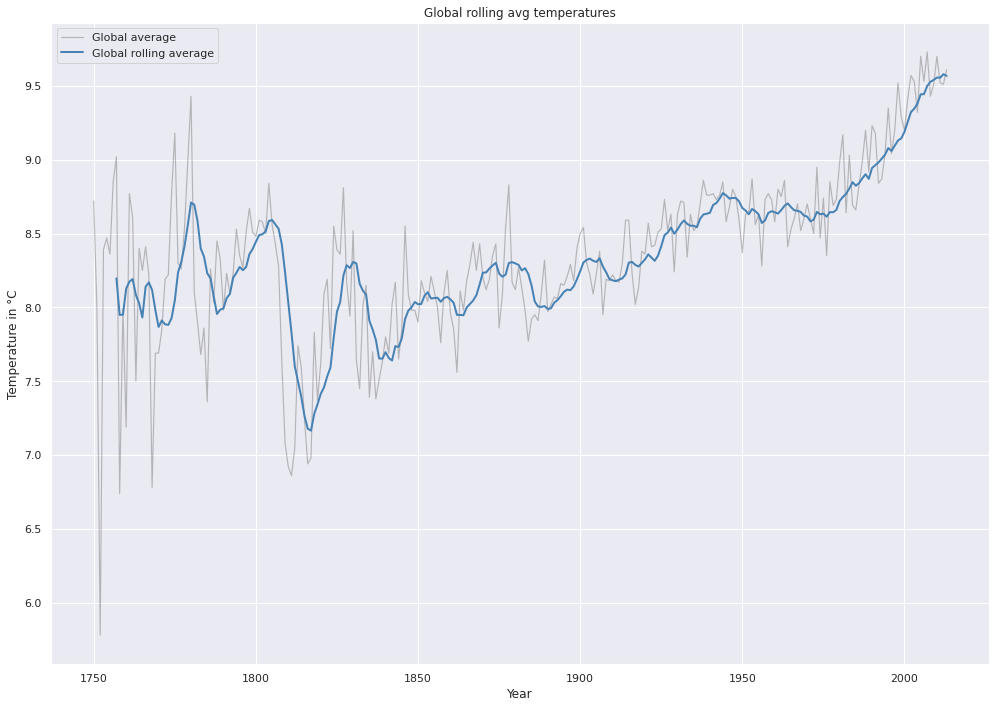

In [18]:
# plot the global data yearly vs rolling averages with a line graph
with sns.plotting_context("notebook"):
    # create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize=sns_figsize)

    sns.lineplot(x='year', y='avg_global_temp', data=weather_df, label='Global average', alpha=0.5, color='grey',
                 lw=1.2)
    sns.lineplot(x='year', y='glob_rolling_average', data=weather_df, label='Global rolling average', color='steelblue',
                 lw=2)

    # show the plot-labels in the legend
    ax.legend()
    # set the y label of the plot
    ax.set_ylabel('Temperature in °C')
    # set the x label of the plot
    ax.set_xlabel('Year')
    # set the title of the plot
    ax.set_title('Global rolling avg temperatures')
    # tighten the plot layout
    plt.tight_layout()
    plt.show()

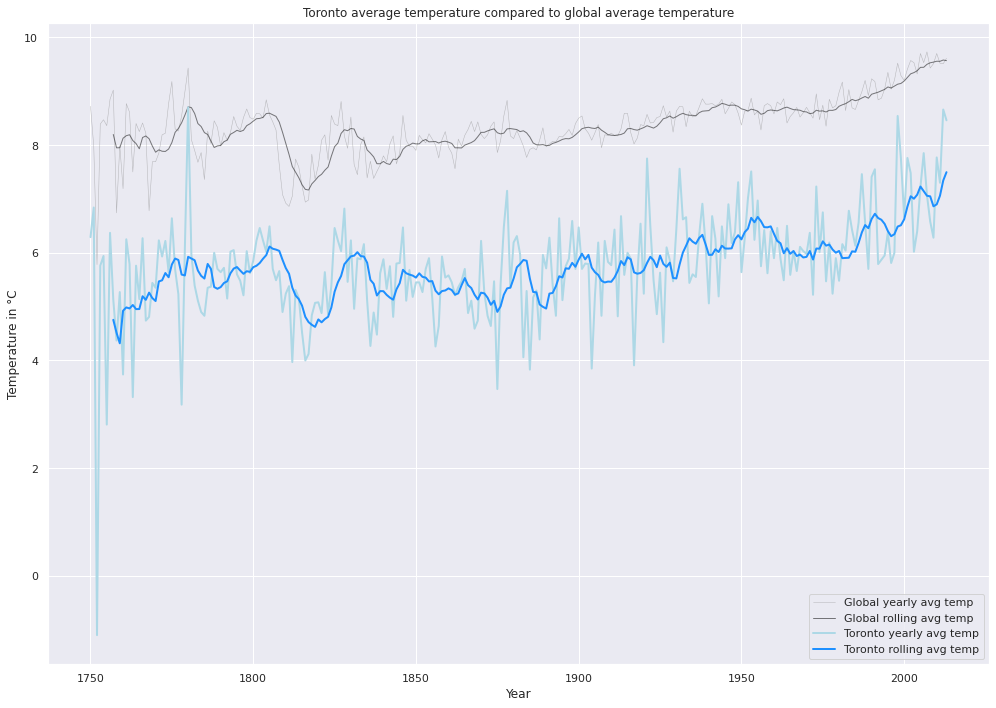

In [13]:
# plot a line graph with local vs global data
with sns.plotting_context("notebook"):
    # create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize=sns_figsize)
    # global, yearly avg and rolling avg
    sns.lineplot(x=df_global_plot['year'], y=df_global_plot['avg_temp'], data=weather_df, label='Global yearly avg temp',
                 alpha=0.5, color='grey',
                 lw=0.5)
    sns.lineplot(x=df_global_plot['year'], y=weather_df["glob_rolling_average"], data=weather_df,
                 label='Global rolling avg temp', alpha=0.5, color='black',
                 lw=1)
    # local, yearly avg and rolling avg
    sns.lineplot(x=df_year, y=toronto_avg_temp, data=weather_df, label='Toronto yearly avg temp', color='lightblue',
                 lw=2)
    sns.lineplot(x=df_year, y=weather_df["toronto_rolling_average"], data=weather_df, label='Toronto rolling avg temp',
                 color='dodgerblue',
                 lw=2)

    # show the plot-labels in the legend
    ax.legend()
    # set the y label of the plot
    ax.set_ylabel('Temperature in °C')
    # set the x label of the plot
    ax.set_xlabel('Year')
    # set the title of the plot
    ax.set_title('Toronto average temperature compared to global average temperature')
    # tighten the plot layout
    plt.tight_layout()
    plt.show()
